### This one is for those who love watching movies. In my first Data Analysis Notebook, I worked on IPL dataset. In this Notebook i will be exploring movies dataset which has about 4500 movies. 
### I will be using Python for my analysis. Along with python i'm also using Pandas, Numpy, Seaborn and Matplotlib for analysis and visualization.

#### Import all the necessary libraries and the input files. 

In [589]:
import pandas as pd   # Used for data manipulation
import numpy as np    # Used for scientific computing
import datetime as dt  # Toextract Date components
import seaborn as sns   # For data Vsualization
import matplotlib.pyplot  as mlt# For data Vsualization
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
mv=pd.read_csv('Downloads/mv/tmdb_5000_movies.csv')

In [637]:
mv.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,budget_in_million,revenue_in_million
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,23.7,278.796509
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,30.0,96.100000


#### Data Cleaning 

##### First step in any data analysis is data cleaning.This includes excluding unneccesary columns, converting column data types, cleaning Nan values etc,.

In [638]:
mv=mv[mv['original_language']=='en']   # Select only movies in English
mv['release_year']=pd.DatetimeIndex(mv['release_date']).year  # Add release year column 
mv['budget_in_million']=mv['budget']/10000000  # convert budget to million
mv['revenue_in_million']=mv['revenue']/10000000  # convert  revenue to million

mv_trim=mv[['original_title','release_year','popularity','budget','budget_in_million','revenue','revenue_in_million','runtime','vote_average','vote_count']]
mv_trim.set_index('original_title',inplace=True)
mv_trim=mv_trim.round(2)

top_mv=mv_trim[mv_trim['vote_count']> 4000].sort_values('vote_count',ascending=False)  # selecting movuies with vote count more than 4000 for fair analyis and to avoid bias.
top_mv['profit_in_million']=top_mv['revenue_in_million'] - top_mv['budget_in_million']
top_mv['revenue_budget_ratio']=top_mv['revenue_in_million']/top_mv['budget_in_million']
top_mv['revenue_budget_ratio']=top_mv.revenue_budget_ratio.astype(int)
top_mv['profit_in_million']=top_mv.profit_in_million.astype(int)
top_mv['release_year']=top_mv.release_year.astype(int)
top_mv['runtime']=top_mv.runtime.astype(int)
top_mv.head()

,release_year,popularity,budget,budget_in_million,revenue,revenue_in_million,runtime,vote_average,vote_count,profit_in_million,revenue_budget_ratio
original_title,,,,,,,,,,,
Inception,2010,167.58,160000000,16.0,825532764,82.55,148,8.1,13752,66,5
The Dark Knight,2008,187.32,185000000,18.5,1004558444,100.46,152,8.2,12002,81,5
Avatar,2009,150.44,237000000,23.7,2787965087,278.80,162,7.2,11800,255,11
The Avengers,2012,144.45,220000000,22.0,1519557910,151.96,143,7.4,11776,129,6
Deadpool,2016,514.57,58000000,5.8,783112979,78.31,108,7.4,10995,72,13


### Movies With Highest Profit Ratio

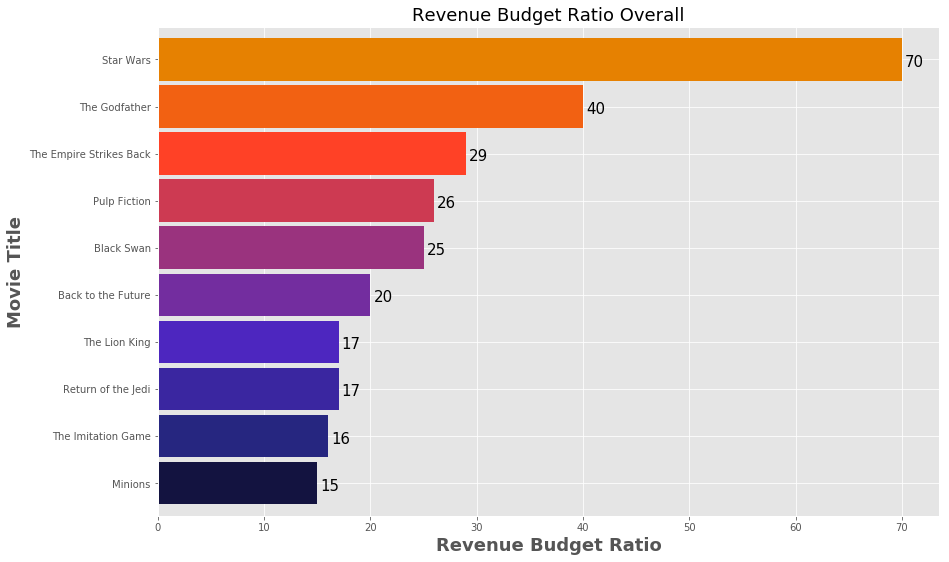

In [597]:
top_mv_revenue_budget_ratio=top_mv.sort_values('revenue_budget_ratio',ascending=False).head(10)
mlt.subplots(figsize=(14,9))
ax = top_mv_revenue_budget_ratio['revenue_budget_ratio'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',15))
ax.set_xlabel("Revenue Budget Ratio", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Revenue Budget Ratio Overall",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

##### Star Wars Movie earned 70 times more money compared to its budget. That's Huge!!!!

### New Movies With Highest Profit Ratio ( After 2000 )

As we can see from above analysis, most of the old movies have highest revenue budget ratio,sice the budget was also low. So, let's do this same comparision for movies before and after the year 2000 to get a fair idea!

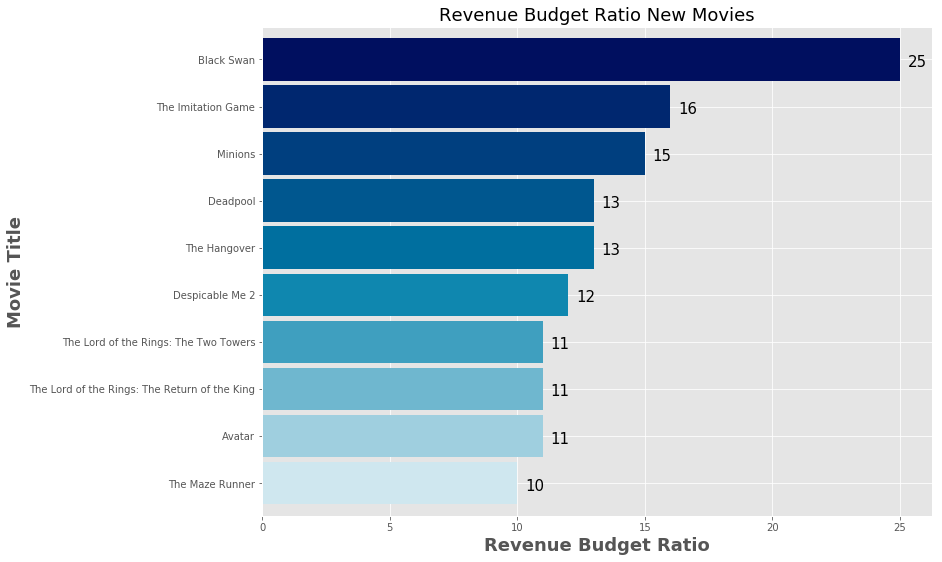

In [598]:
top_new_mv_revenue_budget_ratio=top_mv[top_mv['release_year']>=2000].sort_values('revenue_budget_ratio',ascending=False).head(10)
mlt.subplots(figsize=(12,9))
ax = top_new_mv_revenue_budget_ratio['revenue_budget_ratio'].sort_values().plot.barh(width=0.9,color=sns.color_palette('ocean_r',15))
ax.set_xlabel("Revenue Budget Ratio", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Revenue Budget Ratio New Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

##### Among the new movies "Black Swan" movie earned 25 times more money comapred to it's budget.

### Old Movies With Highest Profit Ratio ( Before 2000 )

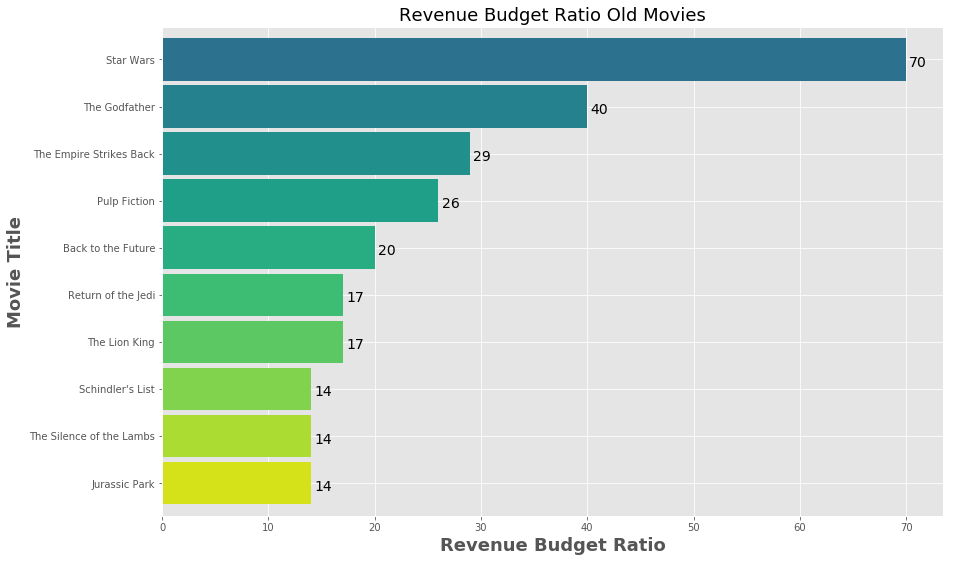

In [622]:
top_old_mv_revenue_budget_ratio=top_mv[top_mv['release_year'] < 2000].sort_values('revenue_budget_ratio',ascending=False).head(10)
mlt.subplots(figsize=(14,9))
ax = top_old_mv_revenue_budget_ratio['revenue_budget_ratio'].sort_values().plot.barh(width=0.9,color=sns.color_palette('viridis_r',15))
ax.set_xlabel("Revenue Budget Ratio", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Revenue Budget Ratio Old Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.3,str(round(i.get_width())), fontsize=14,color='black')
plt.show()

##### Among the old movies "Star Wars" movie earned 70 times more money comapred to it's budget.

### Highest Grossing Movies 

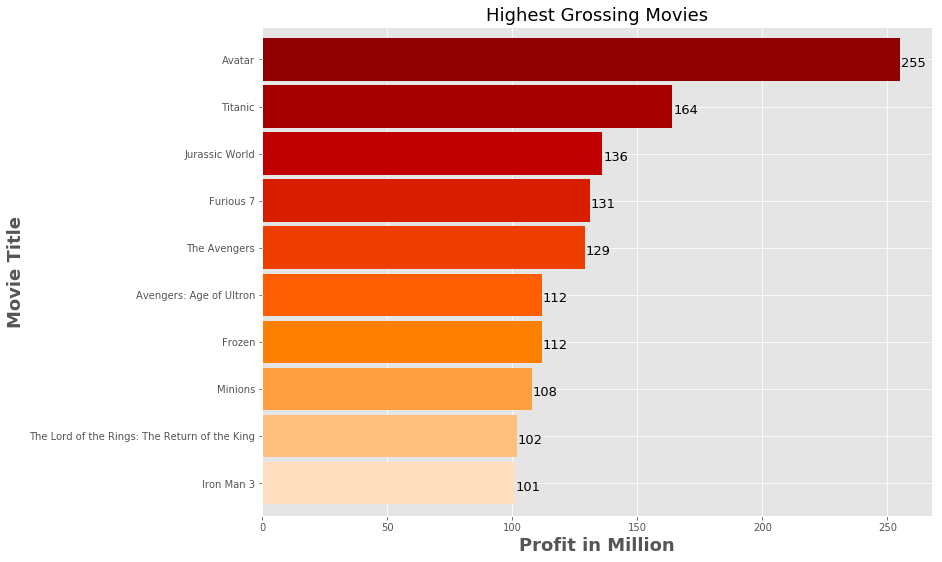

In [633]:
top_mv_highest_profit = top_mv.sort_values('profit_in_million',ascending=False).head(10)
mlt.subplots(figsize=(12,9))
ax = top_mv_highest_profit['profit_in_million'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_heat_r',15))
ax.set_xlabel("Profit in Million", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Grossing Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### Avatar is the highest grossing movie of all time with a whopping box office collection of 255 million!!!

###  Most Voted Movies

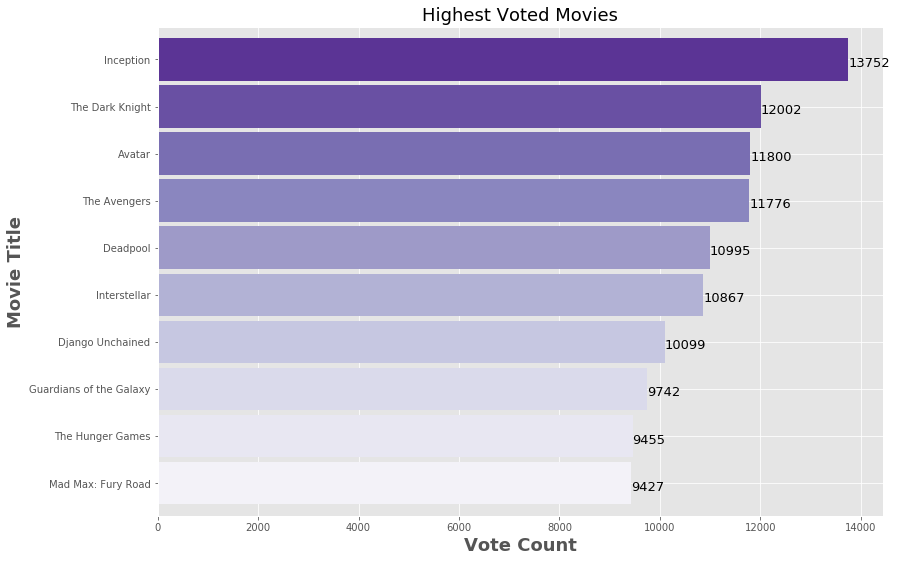

In [634]:
top_voted=top_mv.sort_values('vote_count',ascending=False).head(10)

mlt.subplots(figsize=(13,9))
ax = top_voted['vote_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Purples',11))
ax.set_xlabel("Vote Count", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Voted Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### Inception is the most voted movie of all time. It is an exceptional movie and deserves such response from audience!

### Highest Rated Movies All-time

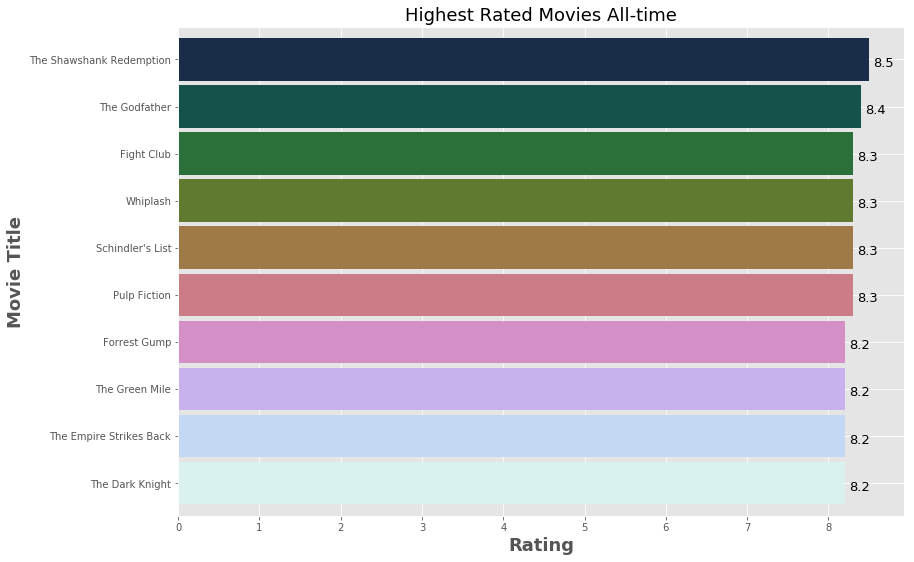

In [603]:
top_rated=top_mv.sort_values('vote_average',ascending=False).head(10)

mlt.subplots(figsize=(13,9))
ax = top_rated['vote_average'].sort_values().plot.barh(width=0.9,color=sns.color_palette('cubehelix_r',11))
ax.set_xlabel("Rating", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Rated Movies All-time",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### "The Shawshank Redemption" is the highest rated movie of all time!

### Highest Rated New Movies 

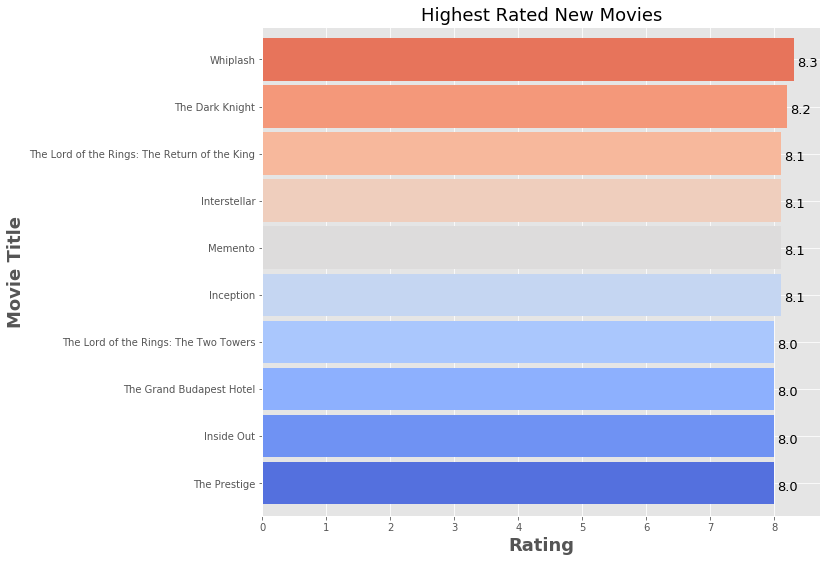

In [635]:
top_rated_new=top_mv[top_mv['release_year'] >= 2000].sort_values('vote_average',ascending=False).head(10)

mlt.subplots(figsize=(10,9))
ax = top_rated_new['vote_average'].sort_values().plot.barh(width=0.9,color=sns.color_palette('coolwarm',11))
ax.set_xlabel("Rating", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Rated New Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### Among the new movies "Whiplash" is the highest rated movie.

### Highest Rated Old Movies 

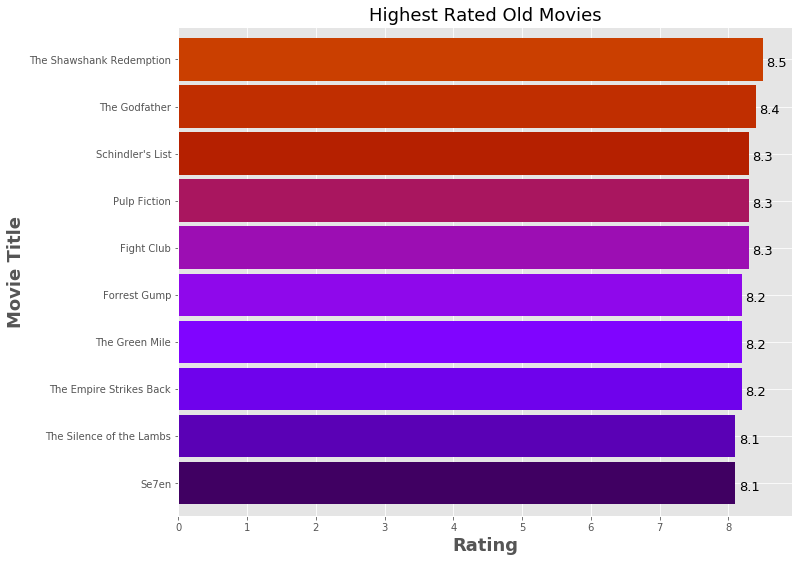

In [571]:
top_rated_old=top_mv[top_mv['release_year'] < 2000 ].sort_values('vote_average',ascending=False).head(10)

mlt.subplots(figsize=(11,9))
ax = top_rated_old['vote_average'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot',15))
ax.set_xlabel("Rating", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Rated Old Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### Among the old movies again,"The Shawshank Redemption" is the highest rated movie.

### Most Popular Movies 

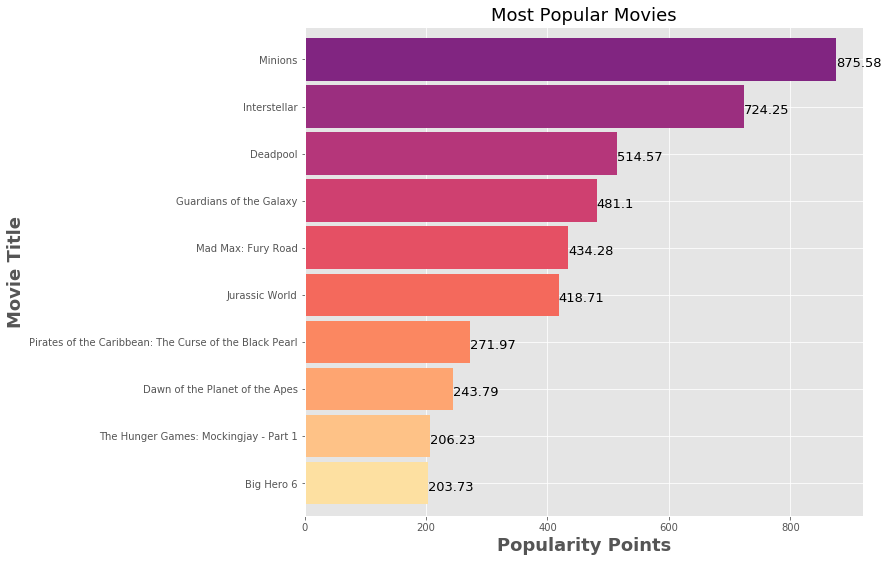

In [614]:
top_popular=top_mv.sort_values('popularity',ascending=False).head(10)

mlt.subplots(figsize=(10,9))
ax = top_popular['popularity'].sort_values().plot.barh(width=0.9,color=sns.color_palette('magma_r',15))
ax.set_xlabel("Popularity Points", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Most Popular Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(i.get_width()), fontsize=13,color='black')
plt.show()

##### When it comes to popularity,there is not much competion to the movie "Minions". It's popularity has no match. 

### Most Expensive Movies 

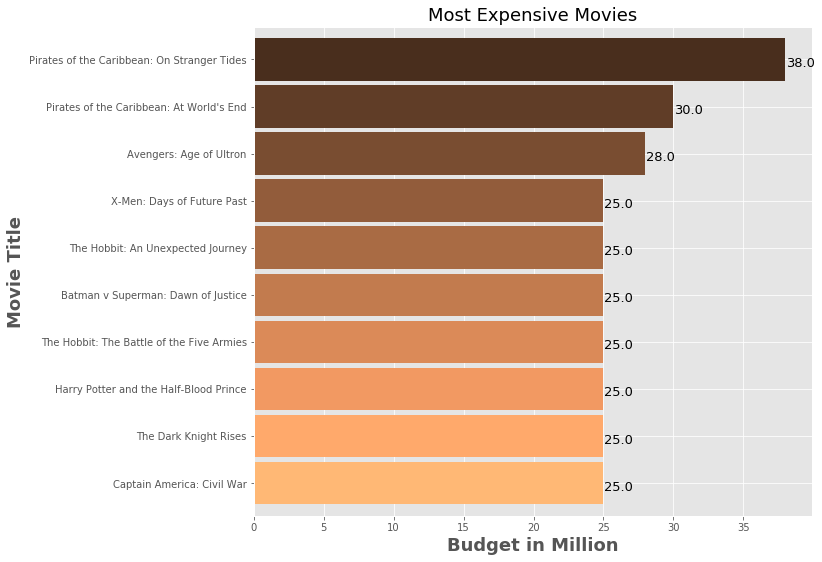

In [632]:
most_expensive=top_mv.sort_values('budget_in_million',ascending=False).head(10)

mlt.subplots(figsize=(10,9))
ax = most_expensive['budget_in_million'].sort_values().plot.barh(width=0.9,color=sns.color_palette('copper_r',12))
ax.set_xlabel("Budget in Million", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Most Expensive Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(round(i.get_width())), fontsize=13,color='black')
plt.show()

##### "Pirates of the Caribbean: On Stranger Tides" is the most expensive movie ever made with a budget of 38 million.

### Movies With Highest Runtime 

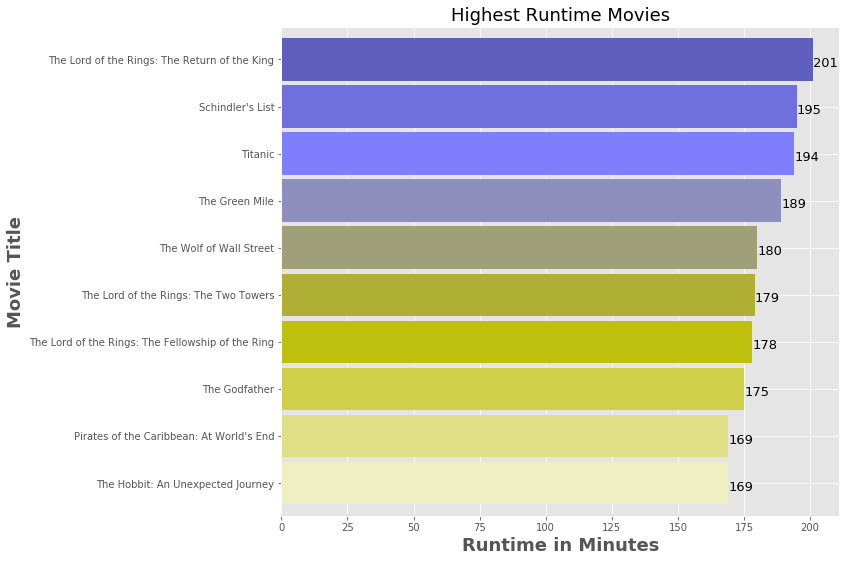

In [613]:
highest_runtime=top_mv.sort_values('runtime',ascending=False).head(10)
mlt.subplots(figsize=(10,9))
ax = highest_runtime['runtime'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_stern_r ',15))
ax.set_xlabel("Runtime in Minutes", fontsize=18)
ax.set_ylabel("Movie Title", fontsize=18)
ax.set_title("Highest Runtime Movies",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.3,str(round(i.get_width())), fontsize=13,color='black')
plt.show()

##### When it comes to lengthiest movies, "The Lord of the Rings: The Return of the King" has highest runtime of 201 minutes.

#### Thank you for checking this Notebook!